# Political Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
import openpyxl

In [2]:
gsod = pd.read_excel('/dataset/political/IDEA-GSOD.xlsx')
hdi_cleaned=pd.read_csv('/dataset/political/hdi_cleaned.csv')
gsod.head()

,Economy ISO3,Economy Name,Indicator ID,Indicator,Attribute 1,Attribute 2,Attribute 3,Partner,1975,1976,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,IDEA.GSOD.abs_corrupt_est,Absence of Corruption (highest score=1),-,-,-,-,0.47,0.47,...,0.21,0.22,0.24,0.24,0.25,0.26,0.25,0.28,0.52,0.46
1,AFG,Afghanistan,IDEA.GSOD.access_just_est,Access to Justice (highest score=1),-,-,-,-,0.31,0.31,...,0.23,0.23,0.23,0.23,0.25,0.22,0.24,0.28,0.24,0.18
2,AFG,Afghanistan,IDEA.GSOD.basic_welf_est,Basic Welfare (highest score=1),-,-,-,-,0.15,0.15,...,0.34,0.37,0.37,0.36,0.36,0.37,0.39,0.39,0.38,0.38
3,AFG,Afghanistan,IDEA.GSOD.civic_engage_est,Civic Engagement (highest score=1),-,-,-,-,NaN,NaN,...,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.43
4,AFG,Afghanistan,IDEA.GSOD.civil_lib_est,Civil Liberties (highest score=1),-,-,-,-,0.35,0.35,...,0.51,0.50,0.51,0.50,0.50,0.50,0.50,0.52,0.34,0.25


In [3]:
hdi_cleaned['country'].unique() 

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Korea (Republic of)', 'Lithuania', 'Luxembourg',
       'Latvia', 'Mexico', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovenia', 'Sweden', 'Turkey',
       'United States'], dtype=object)

In [4]:
gsod['Economy Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia', 'Brazil', 'Barbados', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'India', 'Ire

In [5]:
gsod.loc[gsod['Economy Name'] == 'Korea, Rep.', 'Economy Name'] = 'Korea (Republic of)'


In [6]:
gsod.columns

Index(['Economy ISO3', 'Economy Name', 'Indicator ID', 'Indicator',
       'Attribute 1', 'Attribute 2', 'Attribute 3', 'Partner', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [7]:
twntstcentury = [str(i) for i in range(1989, 2023)]
gsod = gsod[[ 'Economy Name', 'Indicator'] + twntstcentury]
selected_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
    'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea (Republic of)', 'Latvia',
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
    'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Turkey', 'United Kingdom', 'United States'
]


In [8]:
gsod["Economy Name"][gsod["Economy Name"]=='Turkiye']='Turkey'

In [9]:
gsod["Indicator"].unique()

array(['Absence of Corruption (highest score=1)',
       'Access to Justice (highest score=1)',
       'Basic Welfare (highest score=1)',
       'Civic Engagement (highest score=1)',
       'Civil Liberties (highest score=1)',
       'Credible Elections (highest score=1)',
       'Direct Democracy (highest score=1)',
       'Effective Parliament (highest score=1)',
       'Electoral Participation (highest score=1)',
       'Elected Government (highest score=1)',
       'Freedom of Expression (highest score=1)',
       'Freedom of Movement (highest score=1)',
       'Free Political Parties (highest score=1)',
       'Freedom of the Press (highest score=1)',
       'Freedom of Religion (highest score=1)',
       'Gender Equality (highest score=1)',
       'Inclusive Suffrage (highest score=1)',
       'Judicial Independence (highest score=1)',
       'Local Democracy (highest score=1)',
       'Participation (highest score=1)',
       'Personal Integrity and Security (highest score=1)',


In [10]:
# Melt the DataFrame to turn year columns into rows
df_melted = pd.melt(
    gsod,
    id_vars=['Economy Name', 'Indicator'],  # Keep these columns as identifiers
    var_name='Year',  # New column for years
    value_name='Value'  # New column for values
)

df_melted

,Economy Name,Indicator,Year,Value
0,Afghanistan,Absence of Corruption (highest score=1),1989,0.45
1,Afghanistan,Access to Justice (highest score=1),1989,0.25
2,Afghanistan,Basic Welfare (highest score=1),1989,0.13
3,Afghanistan,Civic Engagement (highest score=1),1989,0.58
4,Afghanistan,Civil Liberties (highest score=1),1989,0.23
...,...,...,...,...
1004933,Zimbabwe,Engagement in independent political associatio...,2022,0.61
1004934,Zimbabwe,Engagement in independent trade unions (highes...,2022,0.50
1004935,Zimbabwe,Civil society traditions (highest score=1),2022,0.56
1004936,Zimbabwe,Voter turnout (highest score=1),2022,0.64


In [11]:
# Pivot the DataFrame to make each Indicator a separate column
df_pivoted = df_melted.pivot_table(
    index=['Economy Name', 'Year'],  # Keep Country and Year as identifiers
    columns='Indicator',  # Unique values of Indicator become columns
    values='Value',  # Fill these columns with values
    aggfunc='first'  # Use 'first' if there are duplicate entries
)
df_pivoted

Indicator          Absence of Corruption (highest score=1)  \
Economy Name Year                                            
Afghanistan  1989                                     0.45   
             1990                                     0.45   
             1991                                     0.45   
             1992                                     0.39   
             1993                                     0.23   
...                                                    ...   
Zimbabwe     2018                                     0.29   
             2019                                     0.29   
             2020                                     0.29   
             2021                                     0.28   
             2022                                     0.26   

Indicator          Access to Justice (highest score=1)  \
Economy Name Year                                        
Afghanistan  1989                                 0.25   
             1990                                 0.20   
             1991                                 0.17   
             1992                                 0.13   
             1993                                 0.12   
...                                                ...   
Zimbabwe     2018                                 0.52   
             2019                                 0.51   
             2020                                 0.51   
             2021                                 0.49   
             2022                                 0.49   

Indicator          Access to justice for men (highest score=1)  \
Economy Name Year                                                
Afghanistan  1989                                         0.35   
             1990                                         0.35   
             1991                                         0.29   
             1992                                         0.23   
             1993                                         0.26   
...                                                        ...   
Zimbabwe     2018                                         0.66   
             2019                                         0.66   
             2020                                         0.65   
             2021                                         0.64   
             2022                                         0.64   

Indicator          Access to justice for women (highest score=1)  \
Economy Name Year                                                  
Afghanistan  1989                                           0.45   
             1990                                           0.31   
             1991                                           0.31   
             1992                                           0.27   
             1993                                           0.27   
...                                                          ...   
Zimbabwe     2018                                           0.65   
             2019                                           0.65   
             2020                                           0.65   
             2021                                           0.63   
             2022                                           0.63   

Indicator          Association/ assembly rights (highest score=1)  \
Economy Name Year                                                   
Afghanistan  1989                                             NaN   
             1990                                             NaN   
             1991                                             NaN   
             1992                                             NaN   
             1993                                             NaN   
...                                                           ...   
Zimbabwe     2018                                            0.33   
             2019                                            0.33   
    

In [12]:
#Reset index to flatten the DataFrame
df_pivoted = df_pivoted.reset_index()

df_pivoted = pd.DataFrame(df_pivoted)
df_pivoted

df_pivoted = df_pivoted[df_pivoted["Economy Name"].isin(selected_countries)]


In [13]:
# Remove whitespace
df_pivoted['Year'] = df_pivoted['Year'].str.strip()


# Drop rows where year is not numeric
df_pivoted = df_pivoted[df_pivoted['Year'].str.isnumeric()]

#Convert 'Year' to integer
df_pivoted['Year'] = df_pivoted['Year'].astype(int)

df_pivoted = df_pivoted[df_pivoted["Year"] > 1989]
df_pivoted.rename(columns={'Economy Name': 'country'}, inplace=True)
df_pivoted.rename(columns={'Year': 'year'}, inplace=True)

In [14]:
relevant_indicators=['Absence of Corruption (highest score=1)',
       'Access to Justice (highest score=1)',
       'Basic Welfare (highest score=1)',
       'Civic Engagement (highest score=1)',
       'Civil Liberties (highest score=1)',
       'Credible Elections (highest score=1)',
       'Direct Democracy (highest score=1)',
       'Effective Parliament (highest score=1)',
       'Electoral Participation (highest score=1)',
       'Elected Government (highest score=1)',
       'Freedom of Expression (highest score=1)',
       'Freedom of Movement (highest score=1)',
       'Free Political Parties (highest score=1)',
       'Freedom of the Press (highest score=1)',
       'Gender Equality (highest score=1)',
       'Inclusive Suffrage (highest score=1)',
       'Judicial Independence (highest score=1)',
       'Local Democracy (highest score=1)',
       'Participation (highest score=1)',
       'Personal Integrity and Security (highest score=1)',
       'Political Equality (highest score=1)',
       'Predictable Enforcement (highest score=1)',
       'Representation (highest score=1)', 
       'Rights (highest score=1)',
       'Rule of Law (highest score=1)',
       'Social Group Equality (highest score=1)',
       'Direct democracy (highest score=1)',
       'EMB autonomy (highest score=1)', 'EMB capacity (highest score=1)',
       'Election other voting irregularities (highest score=1)',
       'Election government intimidation (highest score=1)',
       'Election free and fair (highest score=1)',
       'Competition (highest score=1)',
       'Free and fair elections (highest score=1)',
       'Inclusive suffrage (highest score=1)',
       'Election voter registry (highest score=1)',
       'Party ban (highest score=1)',
       'Barriers to parties (highest score=1)',
       "Opposition parties' autonomy (highest score=1)",
       'Elections multiparty (highest score=1)',
       'Competitiveness of participation (highest score=1)',
       'Multiparty elections (highest score=1)',
       'Party system (highest score=1)',
       'Elected executive index (highest score=1)',
       'Competitiveness of executive recruitment (highest score=1)',
       'Openness of executive recruitment (highest score=1)',
       'Electoral (highest score=1)',
       'Lexical index of electoral democracy (highest score=1)',
       'Legislature questions officials in practice (highest score=1)',
       'Executive oversight (highest score=1)',
       'Legislature investigates in practice (highest score=1)',
       'Legislature opposition parties (highest score=1)',
       'Executive constraints (highest score=1)',
       'Local government index (highest score=1)',
       'Subnational elections free and fair (highest score=1)',
       'Judicial corruption decision (highest score=1)',
       'Judicial accountability (highest score=1)',
       'Fair trial (highest score=1)',
       'Civil rights (highest score=1)',
       'Freedom of discussion for women (highest score=1)',
       'Freedom of discussion for men (highest score=1)',
       'Freedom of academic and cultural expression (highest score=1)',
       'Freedom of opinion and expression (highest score=1)',
       'Freedom of speech and press (highest score=1)',
       'Freedom of expression (highest score=1)',
       'Print/broadcast censorship effort (highest score=1)',
       'Harassment of journalists (highest score=1)',
       'Critical Print/broadcast media (highest score=1)',
       'Media bias (highest score=1)', 
       'Media freedom (highest score=1)',
       'CSO entry and exit (highest score=1)',
       'CSO repression (highest score=1)',
       'Freedom of peaceful assembly (highest score=1)',
       'Freedom of assembly and association (highest score=1)',
       "Workers' rights (highest score=1)",
       'Association/ assembly rights (highest score=1)',
       'Freedom of religion (highest score=1)',
       'Religious organization repression (highest score=1)',
       'Freedom of thought, conscience and religion (highest score=1)',
       'Freedom of foreign movement (highest score=1)',
       'Freedom of domestic movement for women (highest score=1)',
       'Freedom of domestic movement for men (highest score=1)',
       'Freedom of movement and residence (highest score=1)',
       'Freedom of domestic movement (highest score=1)',
       'Infant mortality rate (highest score=1)',
       'Life expectancy (highest score=1)',
       'Kilocalories per person per day (highest score=1)',
       'Literacy (highest score=1)',
       'Mean years of schooling (highest score=1)',
       'Educational equality (highest score=1)',
       'Health equality (highest score=1)',
       'Social class equality in respect for civil liberties (highest score=1)',
       'Social group equality in respect for civil liberties (highest score=1)',
       'Power distributed by socio-economic position (highest score=1)',
       'Power distributed by social group (highest score=1)',
       'Power distributed by sexual orientation (highest score=1)',
       'Exclusion by socio-economic group (highest score=1)',
       'Exclusion by political group (highest score=1)',
       'Exclusion by social group (highest score=1)',
       'Exclusion by urban-rural location (highest score=1)',
       'Equal opportunity (highest score=1)',
       "CSO women's participation (highest score=1)",
       'Female vs. male mean years of schooling (highest score=1)',
       'Lower chamber female legislators (highest score=1)',
       'Exclusion by gender (highest score=1)',
       "Women's political rights (highest score=1)",
       "Women's economic rights (highest score=1)",
       'Political empowerment (highest score=1)',
       'High Court independence (highest score=1)',
       'Lower court independence (highest score=1)',
       'Compliance with High Court (highest score=1)',
       'Compliance with judiciary (highest score=1)',
       'Independent judiciary (highest score=1)',
       'Separation of power (highest score=1)',
       'Public sector corrupt exchanges (highest score=1)',
       'Public sector theft (highest score=1)',
       'Executive embezzlement and theft (highest score=1)',
       'Executive bribery and corrupt exchanges (highest score=1)',
       'Prosecution of office abuse (highest score=1)',
       'Executive respects constitution (highest score=1)',
       'Transparent laws with predictable enforcement (highest score=1)',
       'Rigorous and impartial public administration (highest score=1)',
       'Criteria for appointment decisions in the armed forces (highest score=1)',
       'Monopoly on the use of force (highest score=1)',
       'Basic administration (highest score=1)',
       'Freedom from torture (highest score=1)',
       'Freedom from political killings (highest score=1)',
       'Political terror scale (highest score=1)',
       'Engaged society (highest score=1)',
       'E-participation index (highest score=1)',
       'Interest groups (highest score=1)',
       'Social capital (highest score=1)',
       'Engagement in independent non-political associations (highest score=1)',
       'Engagement in independent political associations (highest score=1)',
       'Engagement in independent trade unions (highest score=1)',
       'Civil society traditions (highest score=1)',
       'Voter turnout (highest score=1)',
       'Electoral regime index (highest score=1)',
       'Obstacles to access (highest score=1)',
       'Limits on content (highest score=1)',
       'violations of user rights (highest score=1)']

In [15]:
# Creating a dataframe to store the counts of NaN for each relevant indicator by country
nan_counts = pd.DataFrame(columns=['Country', 'Indicator', 'NaN_Count'])

# Iterating through each country and indicator
for country in df_pivoted["country"].unique():
    for indicator in relevant_indicators:
        # Filtering data for each country and indicator in the specified year range
        specific_data = df_pivoted[(df_pivoted["country"] == country) & (df_pivoted["year"] >= 1989)]
        
        # Counting NaN values for the specific country and indicator
        nan_count = specific_data[indicator].isna().sum()
        
        # Appending the result to the dataframe
        nan_counts = pd.concat([nan_counts, pd.DataFrame([[country, indicator, nan_count]], columns=['Country', 'Indicator', 'NaN_Count'])], ignore_index=True)

# Displaying the resulting dataframe
nan_counts[nan_counts["NaN_Count"] > 0]


,Country,Indicator,NaN_Count
33,Australia,Free and fair elections (highest score=1),33
42,Australia,Party system (highest score=1),33
58,Australia,Civil rights (highest score=1),33
64,Australia,Freedom of expression (highest score=1),33
74,Australia,Workers' rights (highest score=1),6
...,...,...,...
5207,United States,Social capital (highest score=1),33
5211,United States,Civil society traditions (highest score=1),33
5214,United States,Obstacles to access (highest score=1),21
5215,United States,Limits on content (highest score=1),21


In [16]:
nan_many=nan_counts[nan_counts["NaN_Count"] > 0]
nan_many

,Country,Indicator,NaN_Count
33,Australia,Free and fair elections (highest score=1),33
42,Australia,Party system (highest score=1),33
58,Australia,Civil rights (highest score=1),33
64,Australia,Freedom of expression (highest score=1),33
74,Australia,Workers' rights (highest score=1),6
...,...,...,...
5207,United States,Social capital (highest score=1),33
5211,United States,Civil society traditions (highest score=1),33
5214,United States,Obstacles to access (highest score=1),21
5215,United States,Limits on content (highest score=1),21


In [17]:
grouped_nan = nan_many.groupby('Indicator')['NaN_Count'].mean().reset_index();
grouped_nan[grouped_nan["NaN_Count"] > 6]

,Indicator,NaN_Count
0,Association/ assembly rights (highest score=1),26.918919
1,Basic administration (highest score=1),26.918919
2,Civic Engagement (highest score=1),29.0
3,Civil rights (highest score=1),26.918919
4,Civil society traditions (highest score=1),26.918919
5,Competitiveness of executive recruitment (high...,17.0
6,Competitiveness of participation (highest scor...,17.0
7,Criteria for appointment decisions in the arme...,15.0
8,E-participation index (highest score=1),12.891892
10,Engagement in independent non-political associ...,29.0


In [18]:
drop_list = grouped_nan[grouped_nan["NaN_Count"] > 6]["Indicator"]
drop_list = list(drop_list)
df_pivoted = df_pivoted.drop(columns=drop_list)

In [19]:
current_state=np.array(df_pivoted.columns)
current_state

array(['country', 'year', 'Absence of Corruption (highest score=1)',
       'Access to Justice (highest score=1)',
       'Access to justice for men (highest score=1)',
       'Access to justice for women (highest score=1)',
       'Barriers to parties (highest score=1)',
       'Basic Welfare (highest score=1)',
       'CSO consultation (highest score=1)',
       'CSO entry and exit (highest score=1)',
       'CSO participatory environment (highest score=1)',
       'CSO repression (highest score=1)',
       "CSO women's participation (highest score=1)",
       'Civil Liberties (highest score=1)',
       'Competition (highest score=1)',
       'Compliance with High Court (highest score=1)',
       'Compliance with judiciary (highest score=1)',
       'Credible Elections (highest score=1)',
       'Critical Print/broadcast media (highest score=1)',
       'Direct Democracy (highest score=1)',
       'Direct democracy (highest score=1)',
       'EMB autonomy (highest score=1)', 'EMB cap

Let's only choose one or two from each section, as there would be too much correlation to use this many features that are close to each other

In [20]:
# Core Identifiers
relevant_indicators = [
    'country',
    'year',

    # Democracy & Governance
    'Elected Government (highest score=1)',
    'Elected executive index (highest score=1)',
    'Electoral regime index (highest score=1)',
    'Lexical index of electoral democracy (highest score=1)',
    'Local Democracy (highest score=1)',
    'Local government index (highest score=1)',
    'Executive oversight (highest score=1)',
    'Executive respects constitution (highest score=1)',
    'Legislature investigates in practice (highest score=1)',
    'Legislature opposition parties (highest score=1)',
    'Legislature questions officials in practice (highest score=1)',
    'Effective Parliament (highest score=1)',
    'Representation (highest score=1)',

    # Electoral Process & Participation
    'Credible Elections (highest score=1)',
    'Election free and fair (highest score=1)',
    'Election government intimidation (highest score=1)',
    'Election other voting irregularities (highest score=1)',
    'Election voter registry (highest score=1)',
    'Elections multiparty (highest score=1)',
    'Electoral Participation (highest score=1)',
    'Inclusive Suffrage (highest score=1)',
    'Multiparty elections (highest score=1)',
    "Opposition parties' autonomy (highest score=1)",
    'Subnational elections free and fair (highest score=1)',
    'Voter turnout (highest score=1)',

    # Rule of Law & Judiciary
    'Access to Justice (highest score=1)',
    'Access to justice for men (highest score=1)',
    'Access to justice for women (highest score=1)',
    'Compliance with High Court (highest score=1)',
    'Compliance with judiciary (highest score=1)',
    'Fair trial (highest score=1)',
    'High Court independence (highest score=1)',
    'Independent judiciary (highest score=1)',
    'Judicial Independence (highest score=1)',
    'Judicial accountability (highest score=1)',
    'Judicial corruption decision (highest score=1)',
    'Lower court independence (highest score=1)',
    'Predictable Enforcement (highest score=1)',
    'Rule of Law (highest score=1)',
    'Transparent laws with predictable enforcement (highest score=1)',

    # Civil Liberties & Political Rights
    'Civil Liberties (highest score=1)',
    'Direct Democracy (highest score=1)',
    'Freedom of Expression (highest score=1)',
    'Freedom of Movement (highest score=1)',
    'Freedom of Religion (highest score=1)',
    'Freedom of Speech and Press (highest score=1)',
    'Freedom of academic and cultural expression (highest score=1)',
    'Freedom of assembly and association (highest score=1)',
    'Freedom of discussion for men (highest score=1)',
    'Freedom of discussion for women (highest score=1)',
    'Freedom of domestic movement (highest score=1)',
    'Freedom of domestic movement for men (highest score=1)',
    'Freedom of domestic movement for women (highest score=1)',
    'Freedom of foreign movement (highest score=1)',
    'Freedom of movement and residence (highest score=1)',
    'Freedom of opinion and expression (highest score=1)',
    'Freedom of peaceful assembly (highest score=1)',
    'Freedom of thought, conscience and religion (highest score=1)',
    'Free Political Parties (highest score=1)',
    'Inclusive suffrage (highest score=1)',

    # Media & Information
    'Critical Print/broadcast media (highest score=1)',
    'Harassment of journalists (highest score=1)',
    'Media bias (highest score=1)',
    'Media freedom (highest score=1)',
    'Media self-censorship (highest score=1)',
    'Print/broadcast censorship effort (highest score=1)',
    'Print/broadcast media perspectives (highest score=1)',
    'Freedom of the Press (highest score=1)',

    # Corruption & Accountability
    'Executive bribery and corrupt exchanges (highest score=1)',
    'Executive embezzlement and theft (highest score=1)',
    'Public sector corrupt exchanges (highest score=1)',
    'Public sector theft (highest score=1)',
    'Rigorous and impartial public administration (highest score=1)',

    # Political & Social Inclusion
    'Barriers to parties (highest score=1)',
    'Electoral (highest score=1)',
    'Engaged society (highest score=1)',
    'Exclusion by gender (highest score=1)',
    'Exclusion by political group (highest score=1)',
    'Exclusion by social group (highest score=1)',
    'Exclusion by socio-economic group (highest score=1)',
    'Exclusion by urban-rural location (highest score=1)',
    'Gender Equality (highest score=1)',
    'Political Equality (highest score=1)',
    'Political empowerment (highest score=1)',
    'Rights (highest score=1)',
    'Social Group Equality (highest score=1)',
    'Social class equality in respect for civil liberties (highest score=1)',
    'Social group equality in respect for civil liberties (highest score=1)',

    # Personal & Economic Rights
    'Basic Welfare (highest score=1)',
    'Personal Integrity and Security (highest score=1)',
    'Physical integrity rights sum (highest score=1)',
    "Women's economic rights (highest score=1)",
    "Women's political rights (highest score=1)",

    # Health & Education
    'Educational equality (highest score=1)',
    'Female vs. male mean years of schooling (highest score=1)',
    'Health equality (highest score=1)',
    'Infant mortality rate (highest score=1)',
    'Kilocalories per person per day (highest score=1)',
    'Life expectancy (highest score=1)',
    'Mean years of schooling (highest score=1)'
]


In [21]:
# Core Identifiers
relevant_indicators = [
    'country',
    'year',

    # Democracy & Governance
    'Effective Parliament (highest score=1)',

    # Electoral Process & Participation
    'Election free and fair (highest score=1)',
    'Election government intimidation (highest score=1)',
    'Elections multiparty (highest score=1)', #whichever has the least NaN
    'Multiparty elections (highest score=1)', #whichever has the least NaN
    'Voter turnout (highest score=1)',

    # Rule of Law & Judiciary
    'Access to Justice (highest score=1)',
    'Fair trial (highest score=1)',
    'Independent judiciary (highest score=1)', # include the one with least NaN
    'Judicial Independence (highest score=1)', # include the one with least NaN
    'Predictable Enforcement (highest score=1)',
    'Rule of Law (highest score=1)',

    # Civil Liberties & Political Rights
    'Freedom of Religion (highest score=1)',
    'Free Political Parties (highest score=1)',

    # Media & Information
    'Harassment of journalists (highest score=1)',
    'Media bias (highest score=1)',
    'Media freedom (highest score=1)',        
    'Freedom of the Press (highest score=1)', 

    # Corruption & Accountability 
    #We can just get rid of this as we have hdi

    # Political & Social Inclusion
    'Gender Equality (highest score=1)',
    'Political Equality (highest score=1)',

    # Personal & Economic Rights
    #This should be covered by HDI

    # Health & Education

    'Educational equality (highest score=1)',
    'Health equality (highest score=1)',
    'Infant mortality rate (highest score=1)',
    'Kilocalories per person per day (highest score=1)',
    'Life expectancy (highest score=1)',
    'Mean years of schooling (highest score=1)'
]
print(relevant_indicators)

['country', 'year', 'Effective Parliament (highest score=1)', 'Election free and fair (highest score=1)', 'Election government intimidation (highest score=1)', 'Elections multiparty (highest score=1)', 'Multiparty elections (highest score=1)', 'Voter turnout (highest score=1)', 'Access to Justice (highest score=1)', 'Fair trial (highest score=1)', 'Independent judiciary (highest score=1)', 'Judicial Independence (highest score=1)', 'Predictable Enforcement (highest score=1)', 'Rule of Law (highest score=1)', 'Freedom of Religion (highest score=1)', 'Free Political Parties (highest score=1)', 'Harassment of journalists (highest score=1)', 'Media bias (highest score=1)', 'Media freedom (highest score=1)', 'Freedom of the Press (highest score=1)', 'Gender Equality (highest score=1)', 'Political Equality (highest score=1)', 'Educational equality (highest score=1)', 'Health equality (highest score=1)', 'Infant mortality rate (highest score=1)', 'Kilocalories per person per day (highest scor

In [22]:
df_pivoted = df_pivoted[list(relevant_indicators)]

In [23]:
def nan_analysis(df):
    # Count NaN values in each column
    nan_analysis = df.isna().sum()
    # Calculate percentage of NaN values
    nan_analysis_percent = (df.isna().mean() * 100).sort_values(ascending=False)
    # Combine NaN count and percentage into a DataFrame for better analysis
    nan_summary = pd.DataFrame({
        'NaN Count': nan_analysis,
        'Percentage': nan_analysis_percent
    }).sort_values(by='Percentage', ascending=False)
    return nan_summary[nan_summary['Percentage'] > 0]

nan_analysis(df_pivoted)

,NaN Count,Percentage
Indicator,,
Kilocalories per person per day (highest score=1),27,2.218570
Independent judiciary (highest score=1),9,0.739523
Fair trial (highest score=1),4,0.328677
Voter turnout (highest score=1),1,0.082169


In [24]:
df_pivoted.drop(columns=['Kilocalories per person per day (highest score=1)',
'Independent judiciary (highest score=1)',
'Elections multiparty (highest score=1)',
'Multiparty elections (highest score=1)'] , inplace=True)
nan_analysis(df_pivoted)

,NaN Count,Percentage
Indicator,,
Fair trial (highest score=1),4,0.328677
Voter turnout (highest score=1),1,0.082169


In [25]:
msng_features=list(nan_analysis(df_pivoted).index);msng_features

['Fair trial (highest score=1)', 'Voter turnout (highest score=1)']

In [26]:
def missing_countries(df,feature):
    return df[df[feature].isna()][['country', 'year', feature]]
missing_countries(df_pivoted,'Fair trial (highest score=1)')


Indicator,country,year,Fair trial (highest score=1)
1651,Estonia,1991,NaN
2916,Latvia,1991,NaN
3084,Lithuania,1991,NaN
4586,Slovenia,1991,NaN


Baltic States (Latvia, Lithuania, Estonia);
These three countries were under Soviet occupation since World War II.
They took major steps toward regaining their independence from the Soviet Union.
Lithuania became the first Soviet republic to declare independence on March 11, 1990.
Latvia and Estonia followed by declaring the restoration of independence on May 4, 1990 (Latvia) and March 30, 1990 (Estonia).
The Soviet Union initially refused to recognize their independence, leading to economic blockades and later violent confrontations in 1991.

Slovenia
Slovenia was part of Yugoslavia and was seeking more autonomy.
In April 1990, Slovenia held its first multi-party elections, marking the beginning of its democratic transition.
The victory of pro-independence parties paved the way for a referendum on independence in December 1990, where over 88% of Slovenians voted for independence.
This led to Slovenia declaring independence in June 1991, followed by the Ten-Day War against Yugoslav forces.
Overall, 1990 was a crucial year for these nations, as they moved toward breaking away from their respective unions, leading to full independence in the following years.

In [27]:
cts=list(missing_countries(df_pivoted,'Fair trial (highest score=1)').country);cts

['Estonia', 'Latvia', 'Lithuania', 'Slovenia']

In [28]:
def select_country(df, country, feature):
    return df[df['country'] == country][['year', feature]].copy()
select_country(df_pivoted, 'Estonia', 'Fair trial (highest score=1)')

Indicator,year,Fair trial (highest score=1)
1651,1991,NaN
1652,1992,0.67
1653,1993,0.67
1654,1994,0.67
1655,1995,0.67
1656,1996,0.67
1657,1997,0.67
1658,1998,0.67
1659,1999,0.67
1660,2000,0.67


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def fill_missing_with_regression(imported_df, ct, f):
    series = select_country(imported_df, ct, f)  # Copy to avoid SettingWithCopyWarning

    cols = list(series.columns)
    year = cols[0]
    value = cols[1]

    known_data = series.dropna(subset=[value])  # Remove missing values

    if known_data.empty:
        print(f"No known data for {ct} - {f}. Cannot perform regression.")
        return series  # Return the original series without modification
    split_idx = int(len(known_data) * 0.8)  # 80% training, 20% testing
    X_train, X_test = known_data[[year]].iloc[:split_idx], known_data[[year]].iloc[split_idx:]
    y_train, y_test = known_data[value].iloc[:split_idx], known_data[value].iloc[split_idx:]


    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Identify missing values and predict
    missing_years = series[series[value].isna()][year].values.reshape(-1, 1)

    if len(missing_years) > 0:
        series.loc[series[value].isna(), value] = model.predict(missing_years)

    # Update the original dataframe
    imported_df.loc[(imported_df['country'] == ct) & (imported_df[value].isna()), value] = series[value]
    print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, model.predict(X_test))}")
    print(f"Mean squared error: {mean_squared_error(y_test, model.predict(X_test))}")
    print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}")
    
    return imported_df  # Return the modified DataFrame




In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np

def fill_missing_with_regression(imported_df, ct, f):
    """
    Fills missing values in a dataset using Linear and Polynomial Regression (degrees 2 and 3),
    selecting the best model based on Mean Absolute Percentage Error (MAPE).
    
    Parameters:
    - imported_df: DataFrame containing the data
    - ct: Country to filter
    - f: Feature to predict missing values for

    Returns:
    - Updated DataFrame with missing values filled
    """
    series = select_country(imported_df, ct, f).copy()  # Ensure a copy is made
    
    cols = list(series.columns)
    year, value = cols[0], cols[1]

    # Drop missing values
    known_data = series.dropna(subset=[value])

    if known_data.empty:
        print(f"[WARNING] No known data for {ct} - {f}. Cannot perform regression.")
        return imported_df  # Return original dataframe unchanged

    # Sort data by year to maintain sequence
    known_data = known_data.sort_values(by=[year])

    # Train-test split (time-based)
    split_idx = int(len(known_data) * 0.8)  # 80% training, 20% testing
    X_train, X_test = known_data[[year]].iloc[:split_idx], known_data[[year]].iloc[split_idx:]
    y_train, y_test = known_data[value].iloc[:split_idx], known_data[value].iloc[split_idx:]

    # Train Models
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)

    model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
    model_poly2.fit(X_train, y_train)

    model_poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
    model_poly3.fit(X_train, y_train)

    # Evaluate models
    errors = {
        "Linear Regression": mean_absolute_percentage_error(y_test, model_linear.predict(X_test)),
        "Polynomial Degree 2": mean_absolute_percentage_error(y_test, model_poly2.predict(X_test)),
        "Polynomial Degree 3": mean_absolute_percentage_error(y_test, model_poly3.predict(X_test)),
    }

    # Select best model
    best_model_name = min(errors, key=errors.get)
    model_dict = {
        "Linear Regression": model_linear,
        "Polynomial Degree 2": model_poly2,
        "Polynomial Degree 3": model_poly3
    }
    best_model = model_dict[best_model_name]

    print(f"For feature '{f}' in country '{ct}', the best model is {best_model_name} with MAPE: {errors[best_model_name]:.4f}")

    # Predict missing values
    missing_years = series[series[value].isna()][year].values.reshape(-1, 1)
    missing_years = pd.DataFrame(missing_years, columns=[year])  # Ensure correct feature names

    if len(missing_years) > 0:
        predicted_values = best_model.predict(missing_years)
        predicted_values = np.clip(predicted_values, 0, None)  # Avoid negative values if applicable
        series.loc[series[value].isna(), value] = predicted_values

    # Update the original dataframe safely
    imported_df = imported_df.copy()
    imported_df.loc[(imported_df['country'] == ct) & (imported_df[value].isna()), value] = series[value]

    return imported_df  # Return modified DataFrame


In [30]:
# Usage
df_pivoted = fill_missing_with_regression(df_pivoted, 'Estonia', 'Fair trial (highest score=1)')
select_country(df_pivoted, 'Estonia', 'Fair trial (highest score=1)')

For feature 'Fair trial (highest score=1)' in country 'Estonia', the best model is Polynomial Degree 2 with MAPE: 0.1552


Indicator,year,Fair trial (highest score=1)
1651,1991,0.576739
1652,1992,0.670000
1653,1993,0.670000
1654,1994,0.670000
1655,1995,0.670000
1656,1996,0.670000
1657,1997,0.670000
1658,1998,0.670000
1659,1999,0.670000
1660,2000,0.670000


In [31]:
missing_countries(df_pivoted,'Fair trial (highest score=1)')

Indicator,country,year,Fair trial (highest score=1)
2916,Latvia,1991,NaN
3084,Lithuania,1991,NaN
4586,Slovenia,1991,NaN


In [32]:
cts=list(missing_countries(df_pivoted,'Fair trial (highest score=1)').country);cts

['Latvia', 'Lithuania', 'Slovenia']

In [33]:
for i in cts:
    df_pivoted=fill_missing_with_regression(df_pivoted, i, 'Fair trial (highest score=1)')

For feature 'Fair trial (highest score=1)' in country 'Latvia', the best model is Linear Regression with MAPE: 0.0000
For feature 'Fair trial (highest score=1)' in country 'Lithuania', the best model is Polynomial Degree 2 with MAPE: 0.1368
For feature 'Fair trial (highest score=1)' in country 'Slovenia', the best model is Linear Regression with MAPE: 0.2701


In [34]:
missing_countries(df_pivoted,'Fair trial (highest score=1)')

Indicator,country,year,Fair trial (highest score=1)


In [35]:
df_pivoted[df_pivoted['Voter turnout (highest score=1)'].isna()][['country', 'year', 'Voter turnout (highest score=1)']]

Indicator,country,year,Voter turnout (highest score=1)
3084,Lithuania,1991,NaN


In [36]:
ft_nan=df_pivoted[df_pivoted['Fair trial (highest score=1)'].isna()][['country', 'year', 'Fair trial (highest score=1)']];ft_nan


Indicator,country,year,Fair trial (highest score=1)


In [37]:
nan_analysis(df_pivoted)

,NaN Count,Percentage
Indicator,,
Voter turnout (highest score=1),1,0.082169


In [38]:
missing_countries(df_pivoted,'Voter turnout (highest score=1)')

Indicator,country,year,Voter turnout (highest score=1)
3084,Lithuania,1991,NaN


In [39]:
df_pivoted=fill_missing_with_regression(df_pivoted, 'Lithuania', 'Voter turnout (highest score=1)')


For feature 'Voter turnout (highest score=1)' in country 'Lithuania', the best model is Polynomial Degree 2 with MAPE: 0.0836


In [40]:
df_combines = pd.merge(df_pivoted, hdi_cleaned, on=['country', 'year'], how='outer')
df_combines

,country,year,Effective Parliament (highest score=1),Election free and fair (highest score=1),Election government intimidation (highest score=1),Voter turnout (highest score=1),Access to Justice (highest score=1),Fair trial (highest score=1),Judicial Independence (highest score=1),Predictable Enforcement (highest score=1),...,Media freedom (highest score=1),Freedom of the Press (highest score=1),Gender Equality (highest score=1),Political Equality (highest score=1),Educational equality (highest score=1),Health equality (highest score=1),Infant mortality rate (highest score=1),Life expectancy (highest score=1),Mean years of schooling (highest score=1),value
0,Australia,1990,0.85,0.82,0.85,0.82,0.94,1.0,1.00,0.9,...,1.0,0.84,0.78,0.78,0.80,0.88,0.97,0.90,0.39,0.864
1,Australia,1991,0.85,0.82,0.85,0.82,0.94,1.0,1.00,0.9,...,1.0,0.84,0.78,0.78,0.80,0.88,0.97,0.90,0.39,0.866
2,Australia,1992,0.85,0.82,0.85,0.82,0.94,1.0,1.00,0.9,...,1.0,0.84,0.78,0.78,0.80,0.88,0.97,0.90,0.39,0.868
3,Australia,1993,0.85,0.82,0.85,0.84,0.94,1.0,1.00,0.9,...,1.0,0.84,0.78,0.78,0.80,0.88,0.98,0.91,0.40,0.873
4,Australia,1994,0.85,0.82,0.85,0.84,0.94,1.0,1.00,0.9,...,1.0,0.84,0.78,0.79,0.80,0.88,0.98,0.91,0.40,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,United States,2021,0.68,0.81,0.67,0.62,0.76,1.0,0.82,0.7,...,1.0,0.71,0.70,0.66,0.58,0.52,0.98,0.90,0.47,0.921
1216,United States,2022,0.68,0.91,0.81,0.42,0.76,1.0,0.82,0.7,...,1.0,0.71,0.70,0.65,0.61,0.51,0.98,0.90,0.47,0.927
1217,Estonia,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741
1218,Lithuania,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740


In [41]:
df_combines.rename(columns={'value': 'Human Development Index'}, inplace=True)

In [42]:
df_combines['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea (Republic of)', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States'], dtype=object)

In [43]:
nan_analysis(df_combines)

,NaN Count,Percentage
Human Development Index,4,0.327869
Educational equality (highest score=1),3,0.245902
Voter turnout (highest score=1),3,0.245902
Rule of Law (highest score=1),3,0.245902
Predictable Enforcement (highest score=1),3,0.245902
Political Equality (highest score=1),3,0.245902
Media freedom (highest score=1),3,0.245902
Media bias (highest score=1),3,0.245902
Mean years of schooling (highest score=1),3,0.245902
Life expectancy (highest score=1),3,0.245902


In [44]:
missing_countries(df_combines,'Human Development Index')

,country,year,Human Development Index
987,Slovenia,1991,NaN
988,Slovenia,1992,NaN
989,Slovenia,1993,NaN
990,Slovenia,1994,NaN


In [45]:
df_combines=fill_missing_with_regression(df_combines, 'Slovenia', 'Human Development Index')

For feature 'Human Development Index' in country 'Slovenia', the best model is Polynomial Degree 3 with MAPE: 0.0053


In [46]:

# Analyzing for NaN values post-interpolation
nan_analysis(df_combines)

,NaN Count,Percentage
Access to Justice (highest score=1),3,0.245902
Educational equality (highest score=1),3,0.245902
Rule of Law (highest score=1),3,0.245902
Predictable Enforcement (highest score=1),3,0.245902
Political Equality (highest score=1),3,0.245902
Media freedom (highest score=1),3,0.245902
Media bias (highest score=1),3,0.245902
Mean years of schooling (highest score=1),3,0.245902
Life expectancy (highest score=1),3,0.245902
Judicial Independence (highest score=1),3,0.245902


In [47]:
msng_features=list(nan_analysis(df_combines).index);msng_features

['Access to Justice (highest score=1)',
 'Educational equality (highest score=1)',
 'Rule of Law (highest score=1)',
 'Predictable Enforcement (highest score=1)',
 'Political Equality (highest score=1)',
 'Media freedom (highest score=1)',
 'Media bias (highest score=1)',
 'Mean years of schooling (highest score=1)',
 'Life expectancy (highest score=1)',
 'Judicial Independence (highest score=1)',
 'Infant mortality rate (highest score=1)',
 'Health equality (highest score=1)',
 'Harassment of journalists (highest score=1)',
 'Gender Equality (highest score=1)',
 'Freedom of the Press (highest score=1)',
 'Freedom of Religion (highest score=1)',
 'Free Political Parties (highest score=1)',
 'Fair trial (highest score=1)',
 'Election government intimidation (highest score=1)',
 'Election free and fair (highest score=1)',
 'Effective Parliament (highest score=1)',
 'Voter turnout (highest score=1)']

In [48]:
for i in msng_features:
    msng_countries_list=list(missing_countries(df_combines,i).country)

    for j in msng_countries_list:
        df_combines=fill_missing_with_regression(df_combines, j, i)

For feature 'Access to Justice (highest score=1)' in country 'Estonia', the best model is Polynomial Degree 2 with MAPE: 0.0118
For feature 'Access to Justice (highest score=1)' in country 'Lithuania', the best model is Polynomial Degree 2 with MAPE: 0.0780
For feature 'Access to Justice (highest score=1)' in country 'Latvia', the best model is Polynomial Degree 2 with MAPE: 0.0583
For feature 'Educational equality (highest score=1)' in country 'Estonia', the best model is Polynomial Degree 2 with MAPE: 0.0238
For feature 'Educational equality (highest score=1)' in country 'Lithuania', the best model is Polynomial Degree 2 with MAPE: 0.0191
For feature 'Educational equality (highest score=1)' in country 'Latvia', the best model is Polynomial Degree 3 with MAPE: 0.0727
For feature 'Rule of Law (highest score=1)' in country 'Estonia', the best model is Polynomial Degree 2 with MAPE: 0.0951
For feature 'Rule of Law (highest score=1)' in country 'Lithuania', the best model is Polynomial De

In [49]:
nan_analysis(df_combines)

,NaN Count,Percentage


In [50]:

df_combines[df_combines['Educational equality (highest score=1)'].isna()][['country', 'year', 'Educational equality (highest score=1)']]

,country,year,Educational equality (highest score=1)


In [51]:
X=df_combines.drop(columns=['country', 'year'])
correlation_matrix = X.corr()

# Display the correlation matrix
correlation_matrix

,Effective Parliament (highest score=1),Election free and fair (highest score=1),Election government intimidation (highest score=1),Voter turnout (highest score=1),Access to Justice (highest score=1),Fair trial (highest score=1),Judicial Independence (highest score=1),Predictable Enforcement (highest score=1),Rule of Law (highest score=1),Freedom of Religion (highest score=1),...,Media freedom (highest score=1),Freedom of the Press (highest score=1),Gender Equality (highest score=1),Political Equality (highest score=1),Educational equality (highest score=1),Health equality (highest score=1),Infant mortality rate (highest score=1),Life expectancy (highest score=1),Mean years of schooling (highest score=1),Human Development Index
Effective Parliament (highest score=1),1.000000,0.499861,0.574085,0.179721,0.652375,0.553209,0.619367,0.722677,0.732420,0.393150,...,0.462555,0.685085,0.611011,0.667233,0.409144,0.481370,0.457343,0.368550,0.409952,0.444411
Election free and fair (highest score=1),0.499861,1.000000,0.771494,0.113057,0.524544,0.426484,0.416689,0.489704,0.502152,0.277251,...,0.403026,0.559242,0.441079,0.491849,0.451855,0.454052,0.447579,0.387109,0.293845,0.331705
Election government intimidation (highest score=1),0.574085,0.771494,1.000000,0.027183,0.623987,0.619251,0.542847,0.608115,0.624701,0.358905,...,0.566980,0.642116,0.526223,0.580819,0.521941,0.478388,0.486595,0.413244,0.376404,0.423151
Voter turnout (highest score=1),0.179721,0.113057,0.027183,1.000000,0.246718,0.075414,0.035508,0.163741,0.170251,-0.056157,...,-0.031755,0.098302,0.176327,0.191749,0.170233,0.334468,0.089790,0.143884,0.012204,0.053800
Access to Justice (highest score=1),0.652375,0.524544,0.623987,0.246718,1.000000,0.743450,0.630005,0.816710,0.836903,0.371177,...,0.577256,0.761221,0.665808,0.777844,0.785167,0.771639,0.620716,0.493334,0.602778,0.616007
Fair trial (highest score=1),0.553209,0.426484,0.619251,0.075414,0.743450,1.000000,0.638396,0.753058,0.777908,0.495214,...,0.676650,0.706795,0.573685,0.631111,0.582435,0.519903,0.637812,0.552581,0.562284,0.652621
Judicial Independence (highest score=1),0.619367,0.416689,0.542847,0.035508,0.630005,0.638396,1.000000,0.696556,0.748377,0.473399,...,0.498708,0.745972,0.664314,0.671830,0.451176,0.430300,0.388922,0.294035,0.382851,0.416579
Predictable Enforcement (highest score=1),0.722677,0.489704,0.608115,0.163741,0.816710,0.753058,0.696556,1.000000,0.993434,0.501538,...,0.631732,0.793878,0.651613,0.717761,0.633101,0.594119,0.565305,0.460110,0.576068,0.627681
Rule of Law (highest score=1),0.732420,0.502152,0.624701,0.170251,0.836903,0.777908,0.748377,0.993434,1.000000,0.518510,...,0.642003,0.820949,0.695214,0.759245,0.661782,0.615655,0.587908,0.470166,0.595972,0.643426
Freedom of Religion (highest score=1),0.393150,0.277251,0.358905,-0.056157,0.371177,0.495214,0.473399,0.501538,0.518510,1.000000,...,0.428558,0.495301,0.311274,0.359370,0.390280,0.254900,0.427749,0.133606,0.237036,0.264270


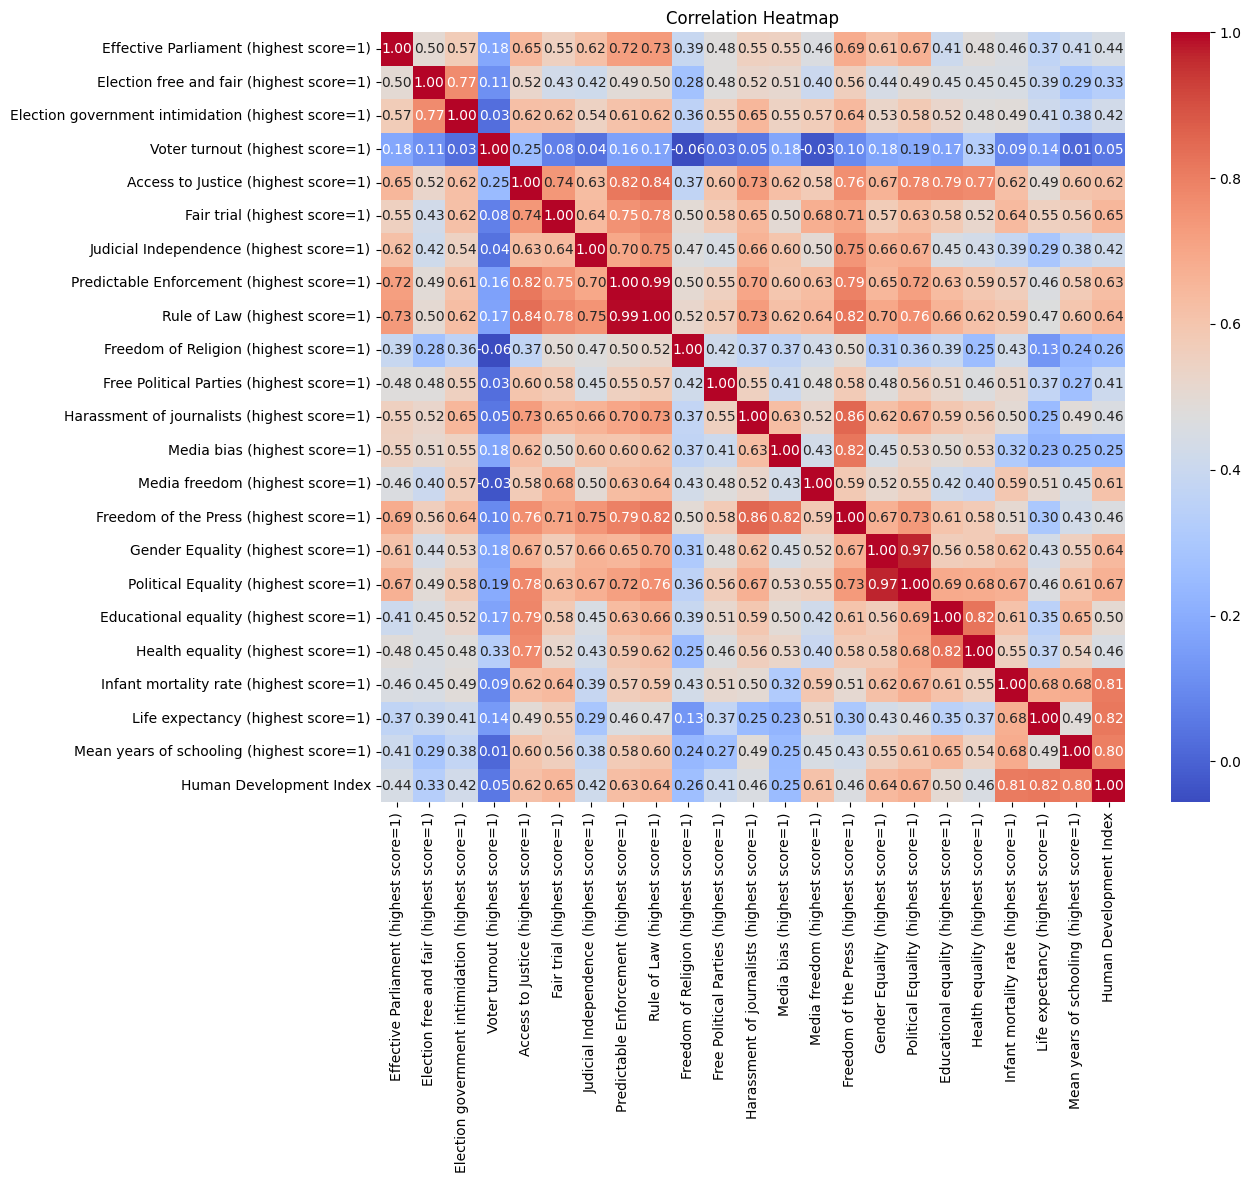

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Positive correlation (+1 to +0.7): Two features increase together.
Negative correlation (-1 to -0.7): One feature increases while the other decreases

In [53]:
df_combines['Voter turnout (highest score=1)'].describe()

count    1220.000000
mean        0.665513
std         0.141692
min         0.240000
25%         0.560000
50%         0.690000
75%         0.780000
max         0.950000
Name: Voter turnout (highest score=1), dtype: float64

In [54]:
import numpy as np

# Compute correlation matrix

# Get upper triangle of the matrix (to avoid duplicate values)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with high correlation
threshold = 0.8  # Adjust based on your needs
correlated_features = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

print("Highly correlated features:", correlated_features)

Highly correlated features: ['Predictable Enforcement (highest score=1)', 'Rule of Law (highest score=1)', 'Freedom of the Press (highest score=1)', 'Political Equality (highest score=1)', 'Health equality (highest score=1)', 'Human Development Index']


In [55]:
dropping=['Rule of Law (highest score=1)','Political Equality (highest score=1)','Access to Justice (highest score=1)']
df_combines.drop(columns=dropping, inplace=True)

In [62]:
df_combines['Media freedom (highest score=1)'].unique()

array([1.        , 0.5       , 0.        , 0.64695652])

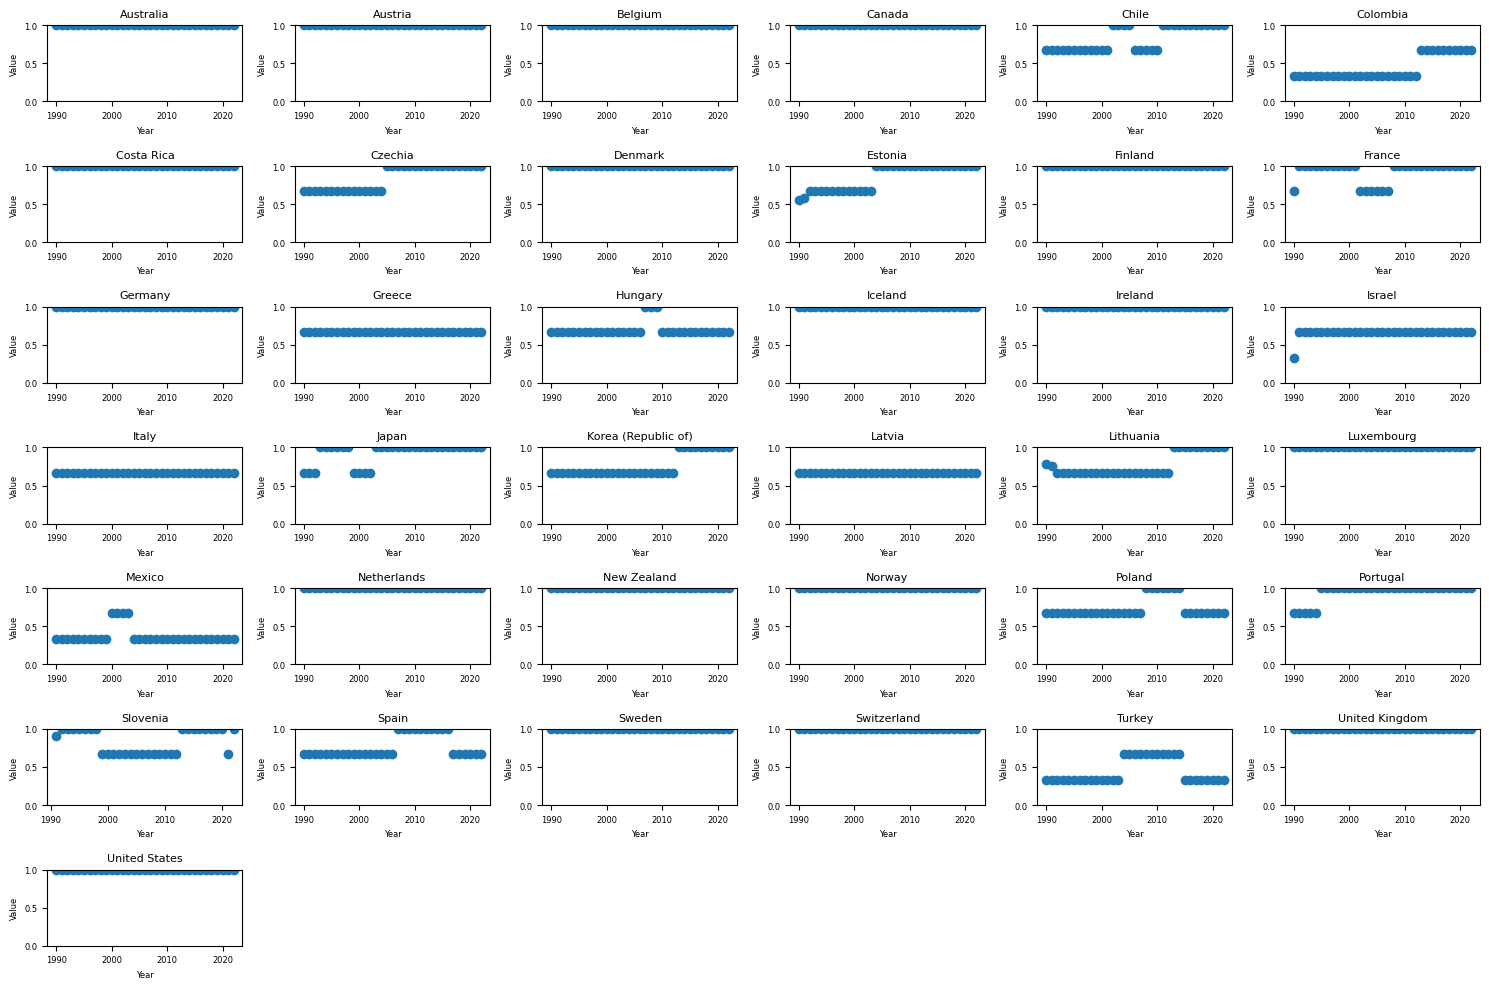

In [57]:
def plot_feature_by_country(df, feature, y_label='Value'):
    """
    Plots a scatterplot for the specified feature for each country in the dataset.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing 'country', 'year', and the feature column.
    - feature (str): The column name for the feature to plot.
    - y_label (str): Label for the y-axis (default is 'Value').
    """
    unique_countries = df['country'].unique()
    num_countries = len(unique_countries)

    # Calculate grid size for efficient layout
    rows = int(num_countries**0.5) + 1
    cols = int(num_countries / rows) + 1

    plt.figure(figsize=(15, 10))

    for idx, country in enumerate(unique_countries, start=1):
        plt.subplot(rows, cols, idx)
        country_data = df[df['country'] == country]

        plt.scatter(country_data['year'], country_data[feature])
        plt.title(country, fontsize=8)
        plt.ylim(0, 1)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.xlabel('Year', fontsize=6)
        plt.ylabel(y_label, fontsize=6)

    plt.tight_layout()
    plt.show()

plot_feature_by_country(df_combines, 'Fair trial (highest score=1)')


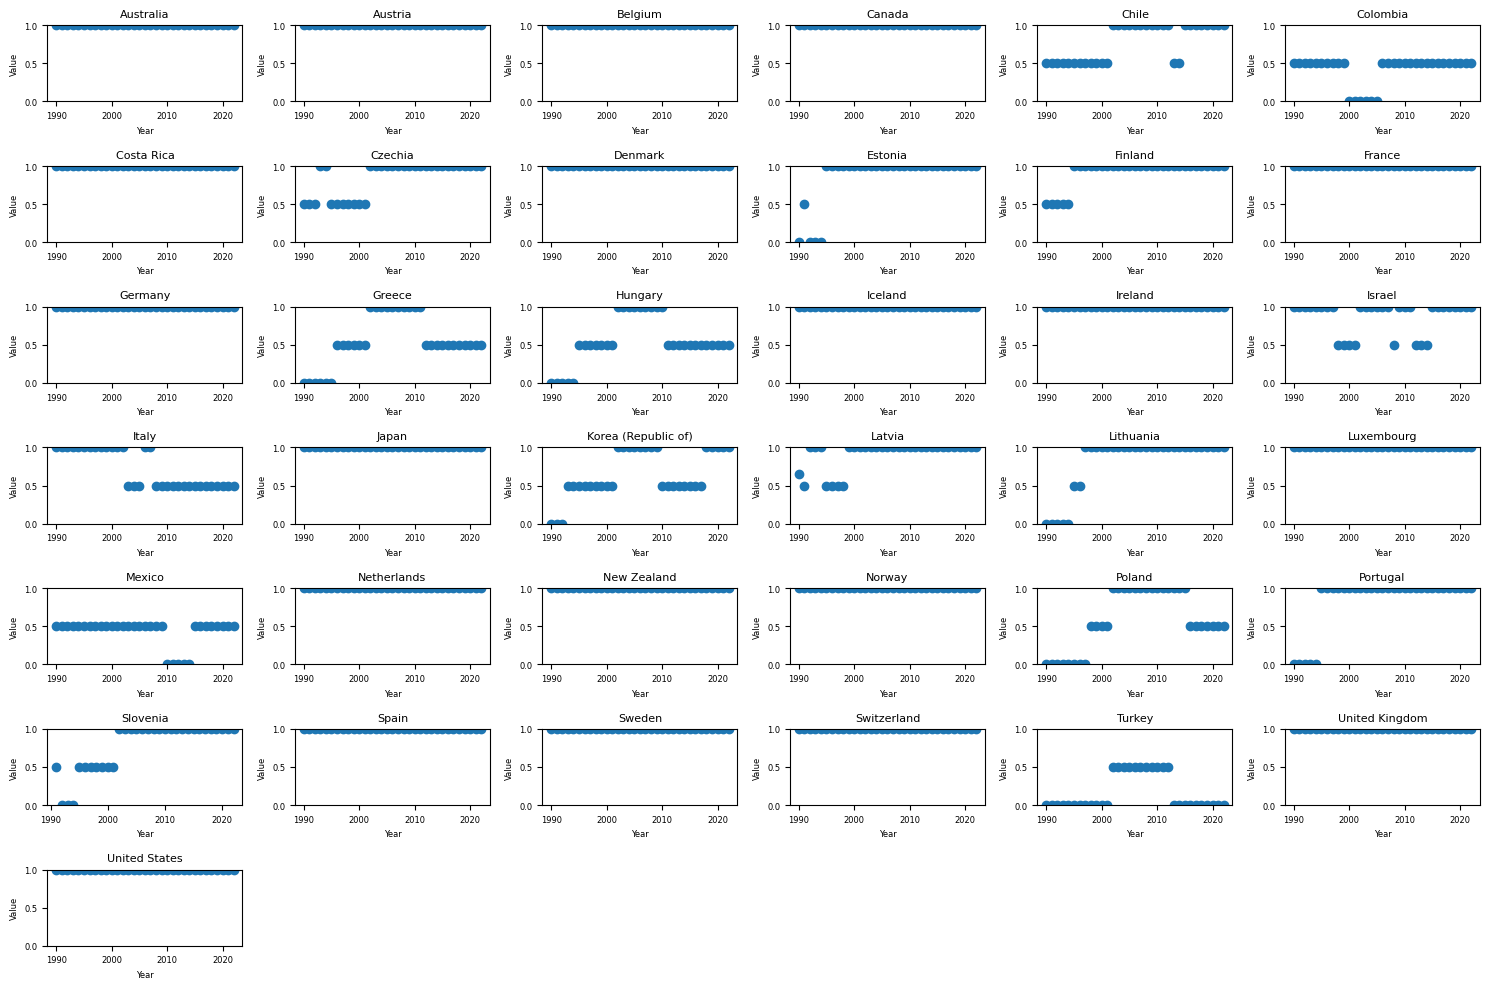

In [58]:
plot_feature_by_country(df_combines, 'Media freedom (highest score=1)')


In [59]:
def variance_analysis(df, feature):
    """
    Calculates the variance of the specified feature for each country in the dataset.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'country', 'year', and the feature column.
    - feature (str): The column name for the feature to analyze.

    Returns:
    - Plots the variance of the specified feature for each country.
    """
    country_variances = {}

    # Calculate variance for each country
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        country_variances[country] = country_data[feature].var()

    # Sort countries by variance
    sorted_countries = sorted(country_variances.items(), key=lambda x: x[1], reverse=True)

    # Plot variance for each country
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_countries)), [variance[1] for variance in sorted_countries], align='center')
    plt.xticks(range(len(sorted_countries)), [variance[0] for variance in sorted_countries], rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Variance')
    plt.title(f'Variance of {feature} by Country')
    plt.show()

    


In [60]:
def variance_analysis_all_countries(d

SyntaxError: unexpected EOF while parsing (167617480.py, line 1)

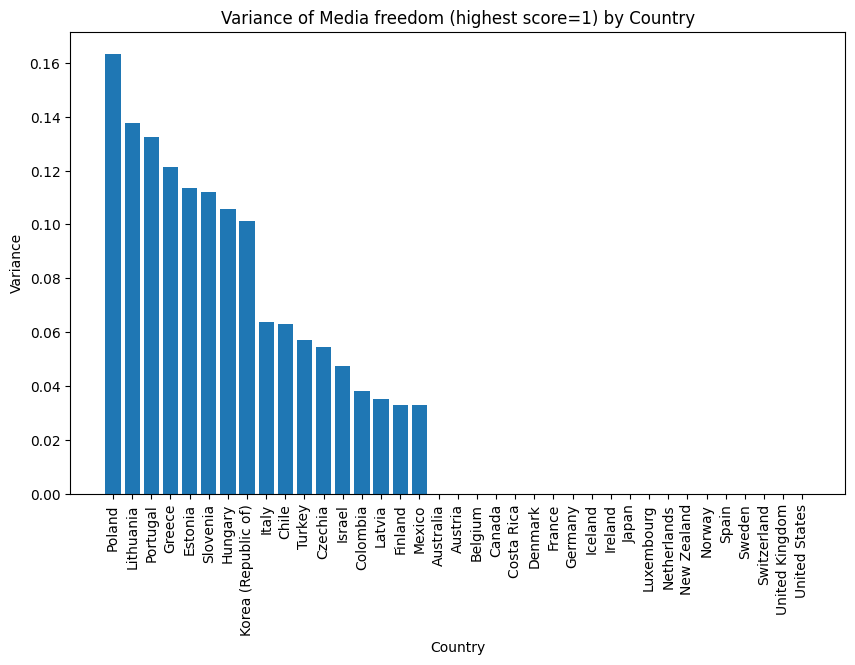

In [67]:
variance_analysis(df_combines, 'Media freedom (highest score=1)')

In [71]:
df_combines.columns

Index(['country', 'year', 'Effective Parliament (highest score=1)',
       'Election free and fair (highest score=1)',
       'Election government intimidation (highest score=1)',
       'Voter turnout (highest score=1)', 'Fair trial (highest score=1)',
       'Judicial Independence (highest score=1)',
       'Predictable Enforcement (highest score=1)',
       'Freedom of Religion (highest score=1)',
       'Free Political Parties (highest score=1)',
       'Harassment of journalists (highest score=1)',
       'Media bias (highest score=1)', 'Media freedom (highest score=1)',
       'Freedom of the Press (highest score=1)',
       'Gender Equality (highest score=1)',
       'Educational equality (highest score=1)',
       'Health equality (highest score=1)',
       'Infant mortality rate (highest score=1)',
       'Life expectancy (highest score=1)',
       'Mean years of schooling (highest score=1)', 'Human Development Index'],
      dtype='object')

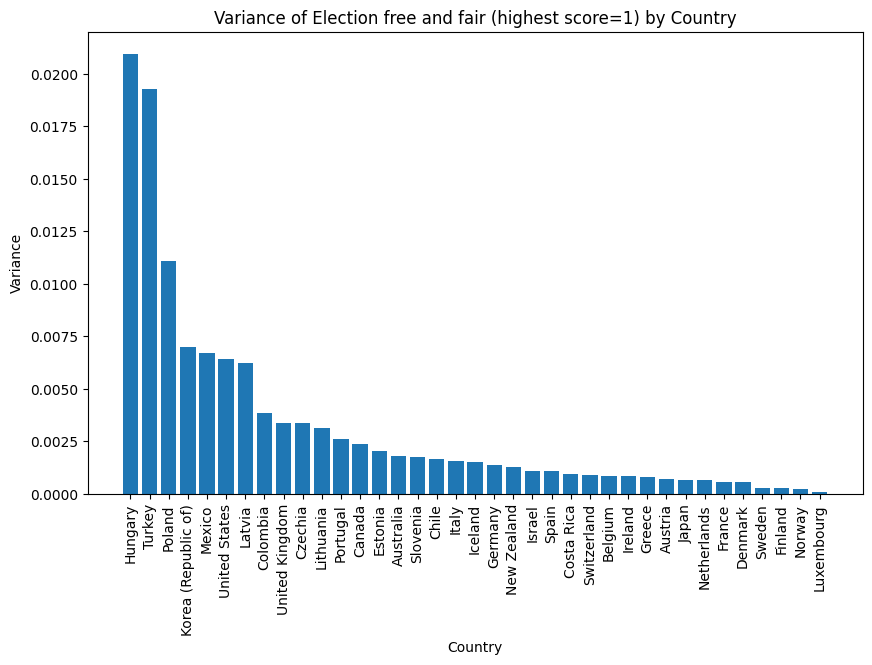

In [73]:
variance_analysis(df_combines, 'Election free and fair (highest score=1)')

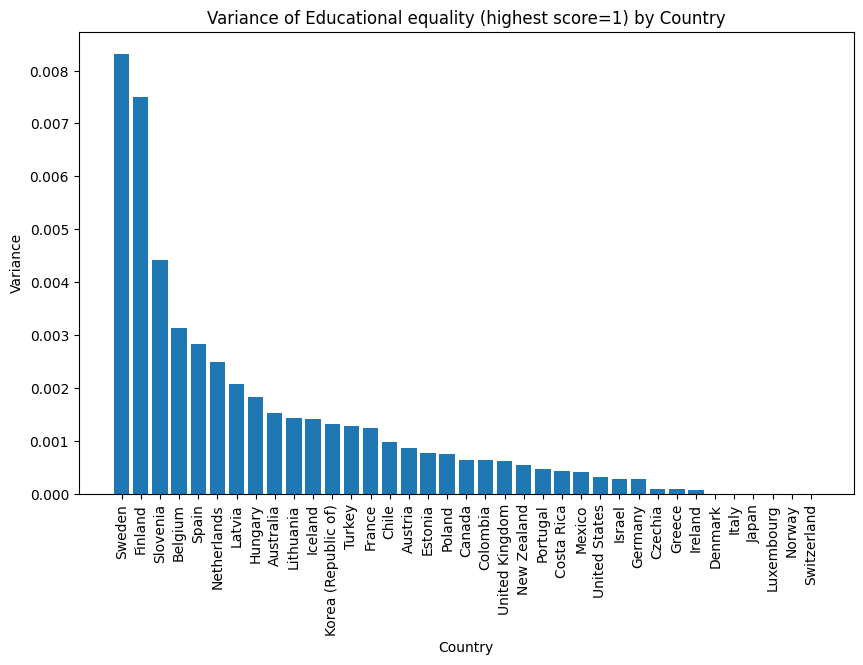

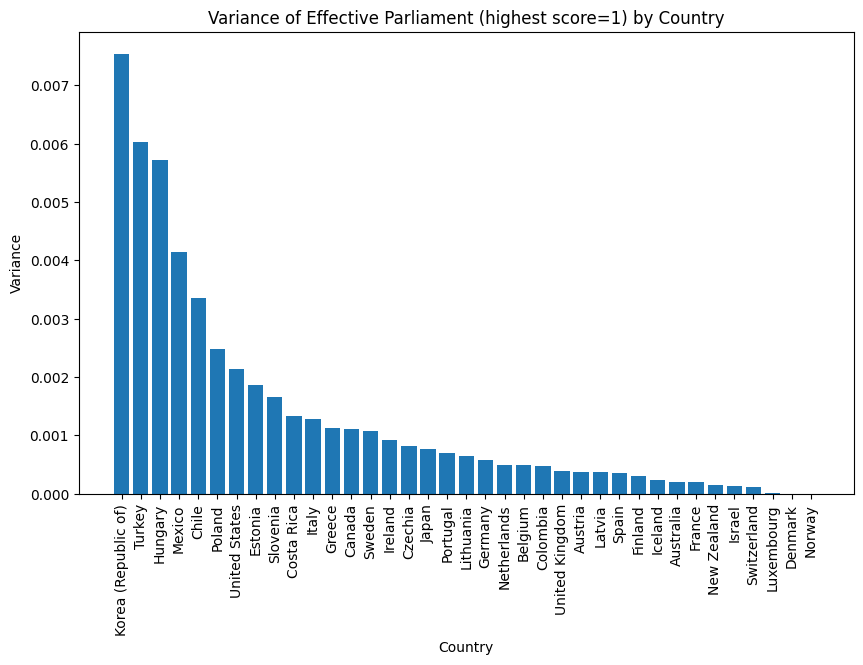

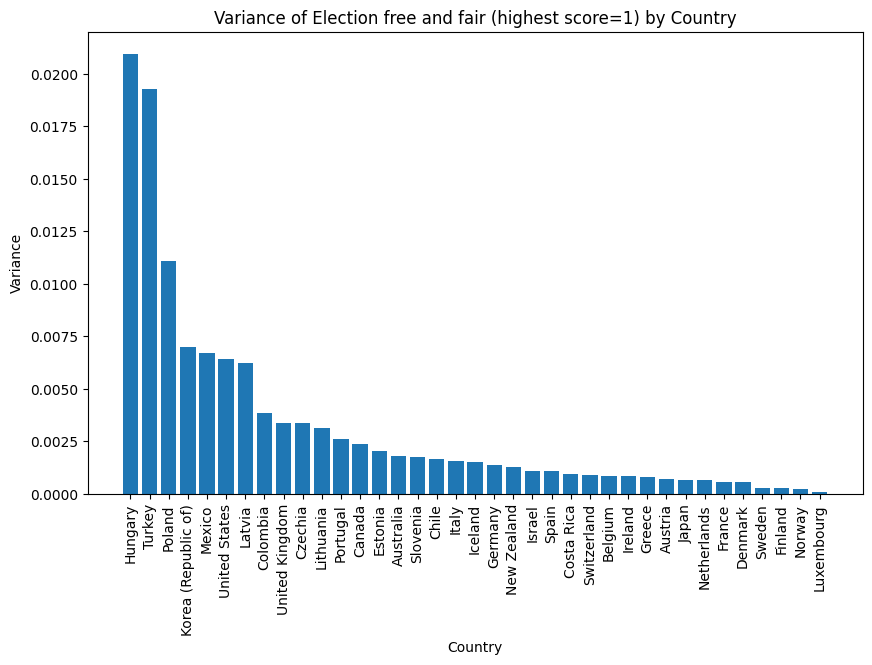

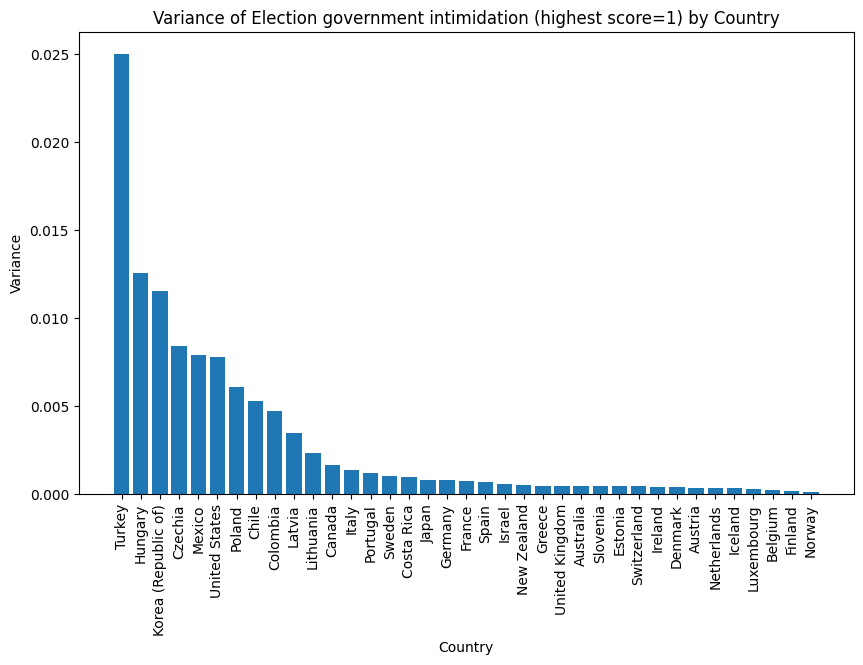

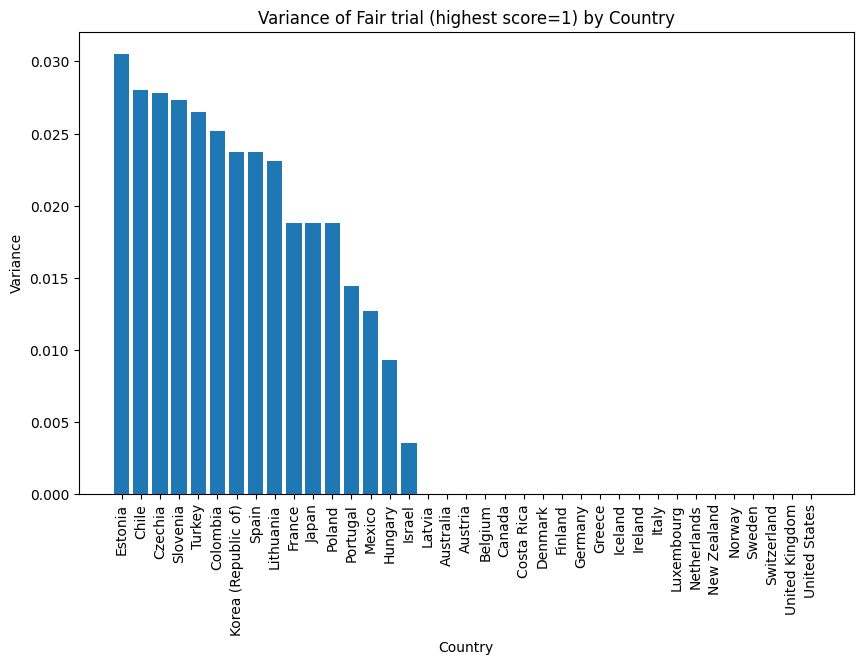

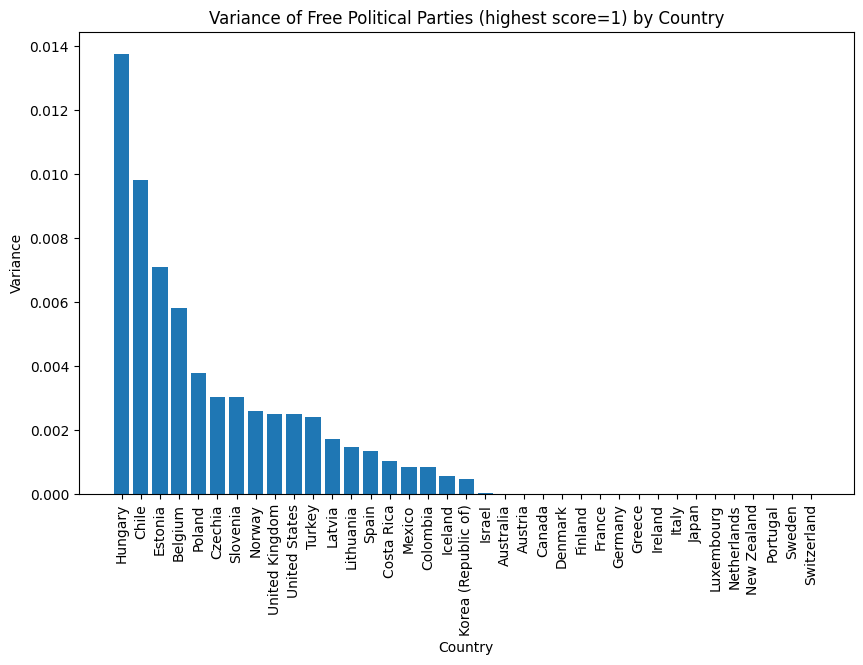

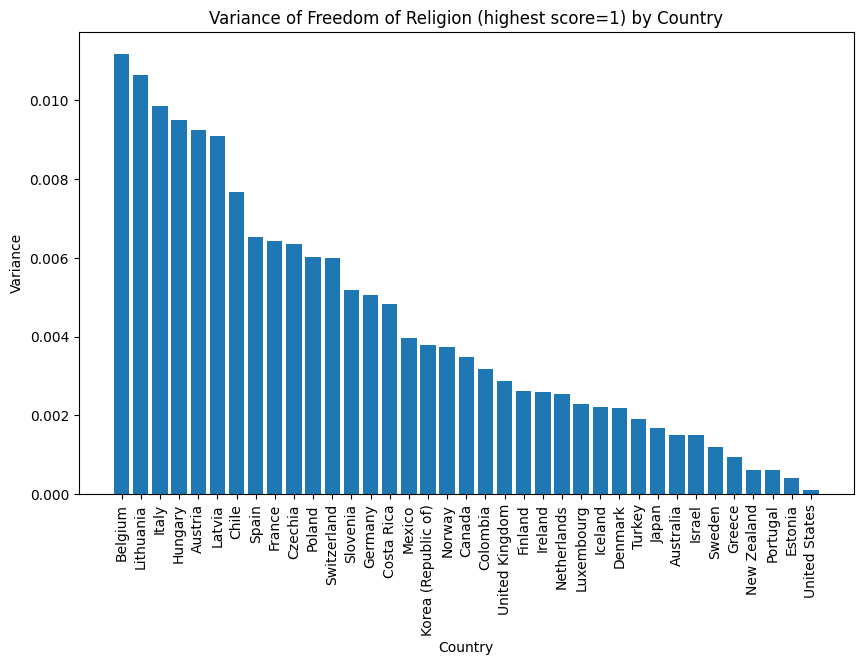

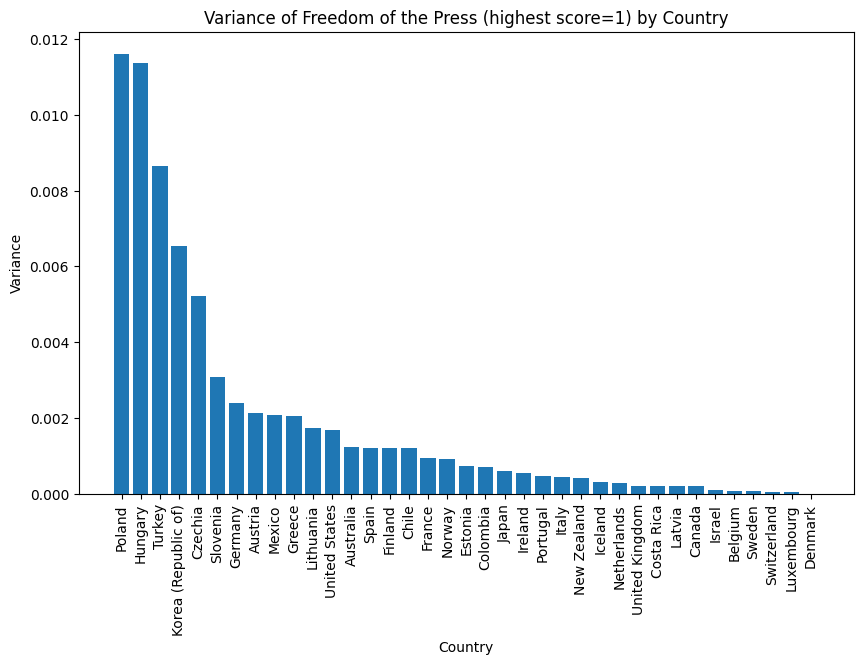

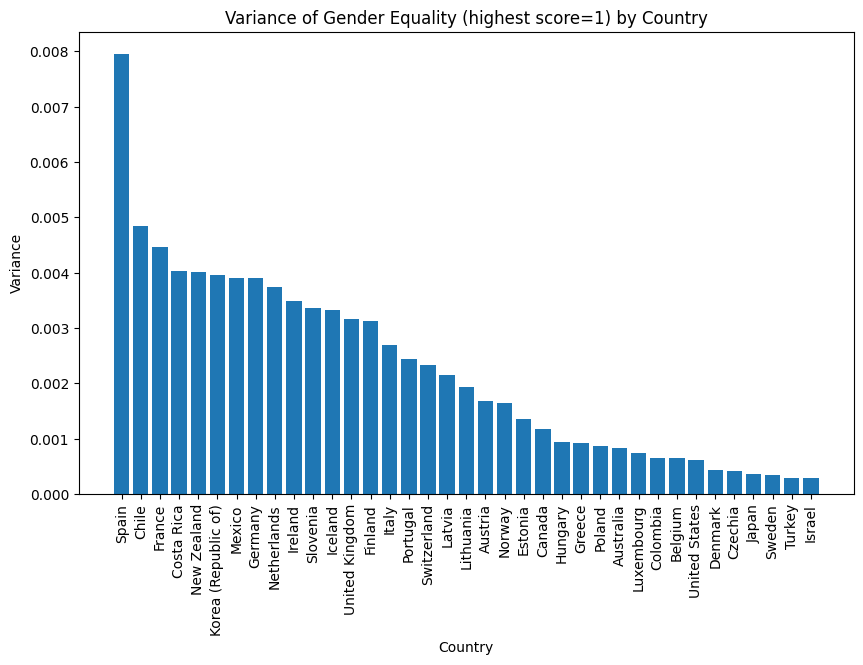

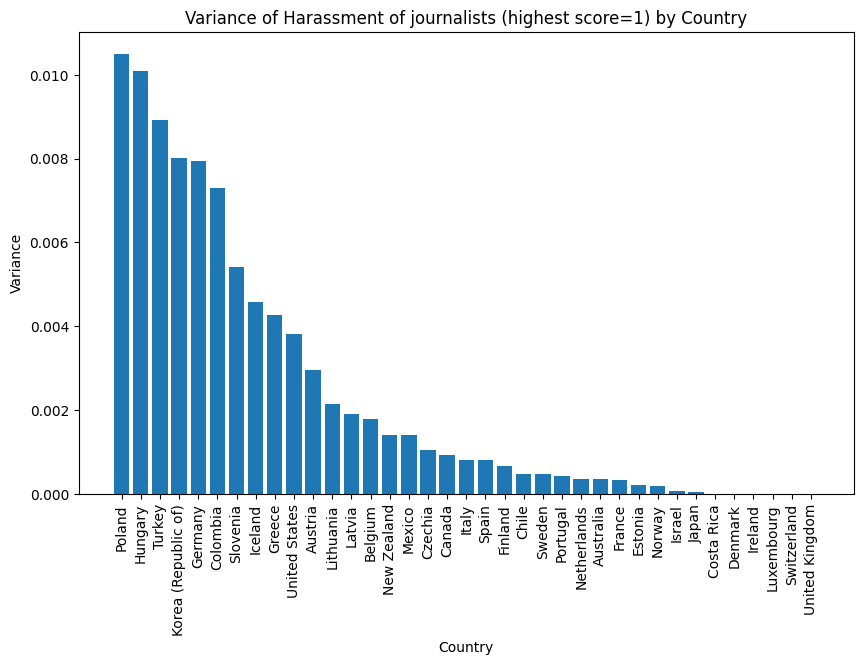

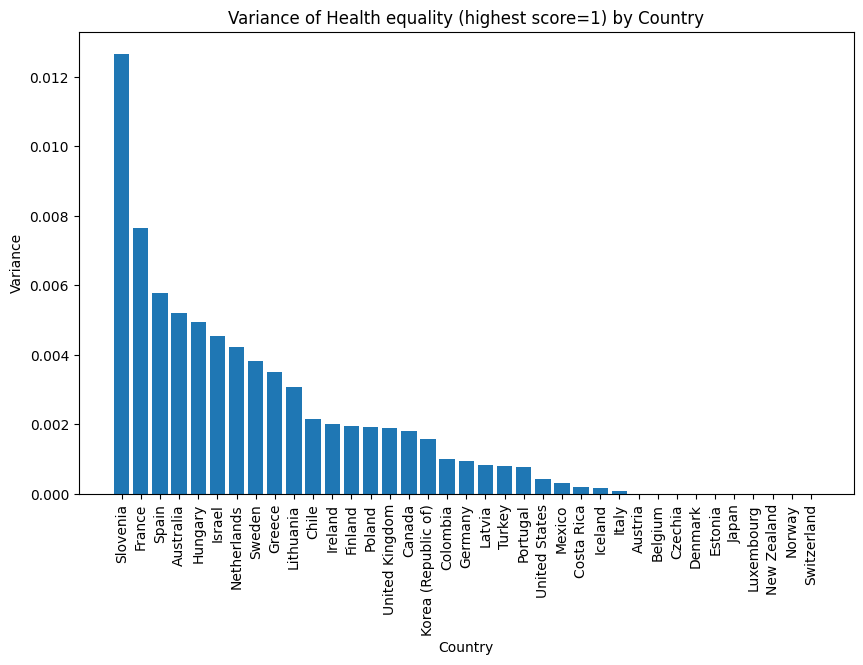

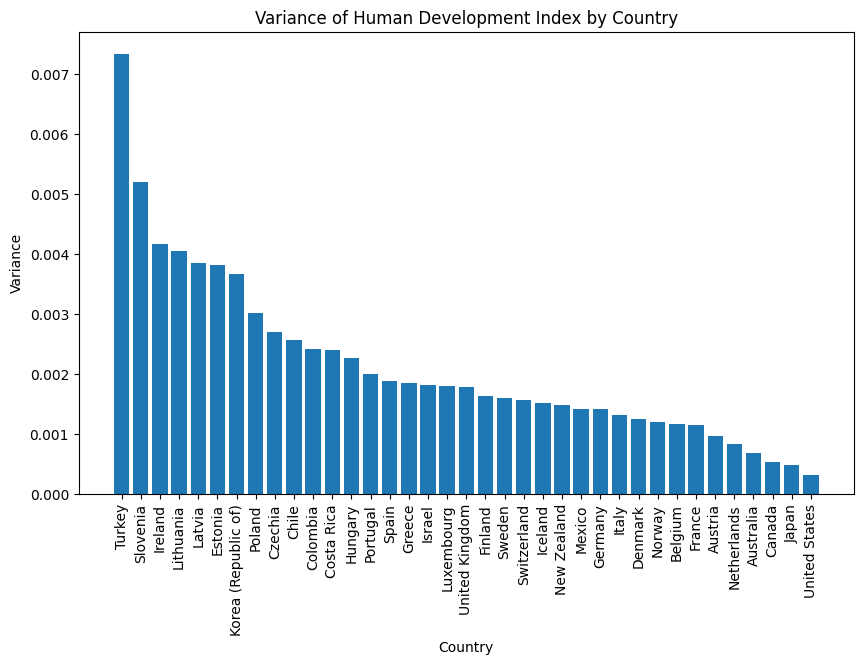

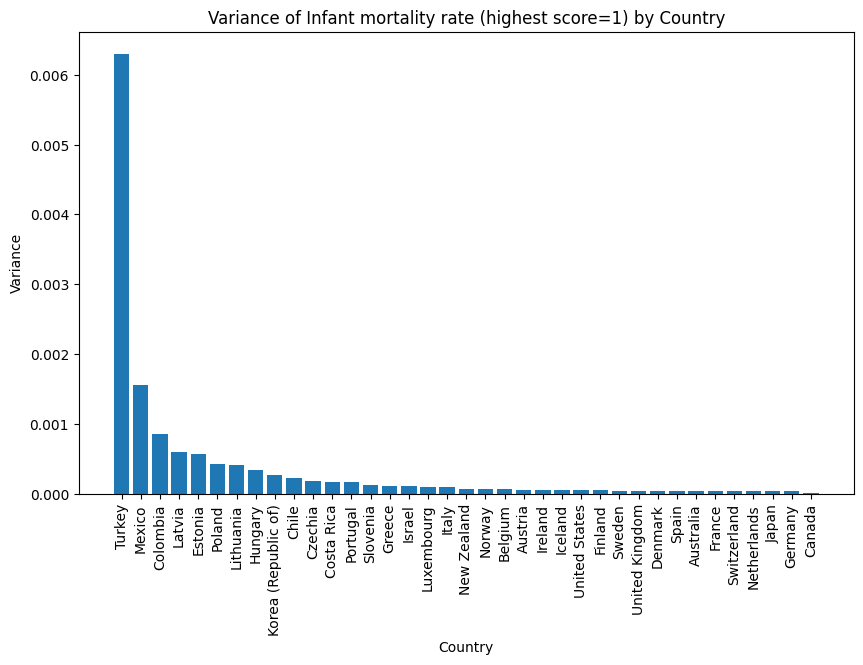

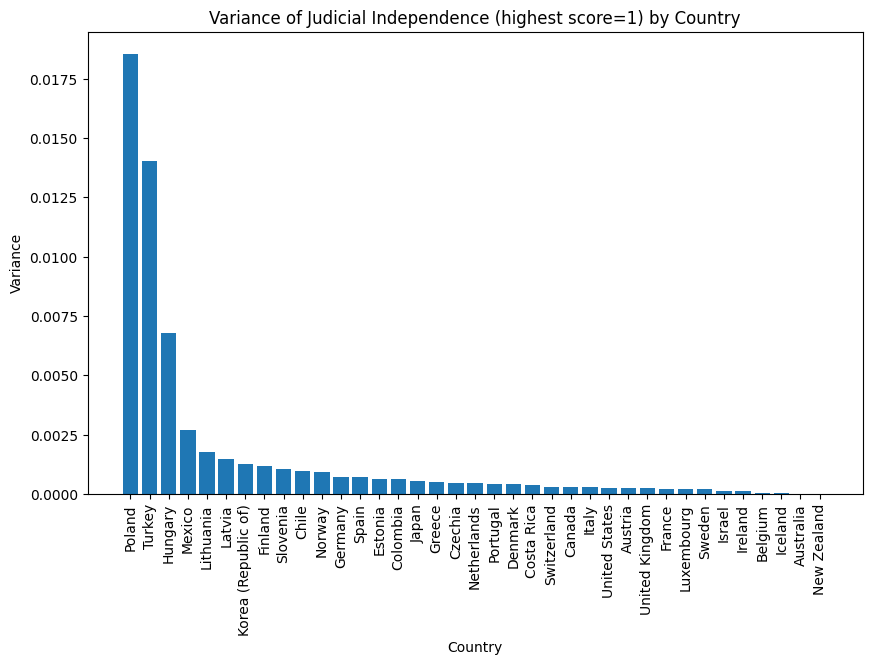

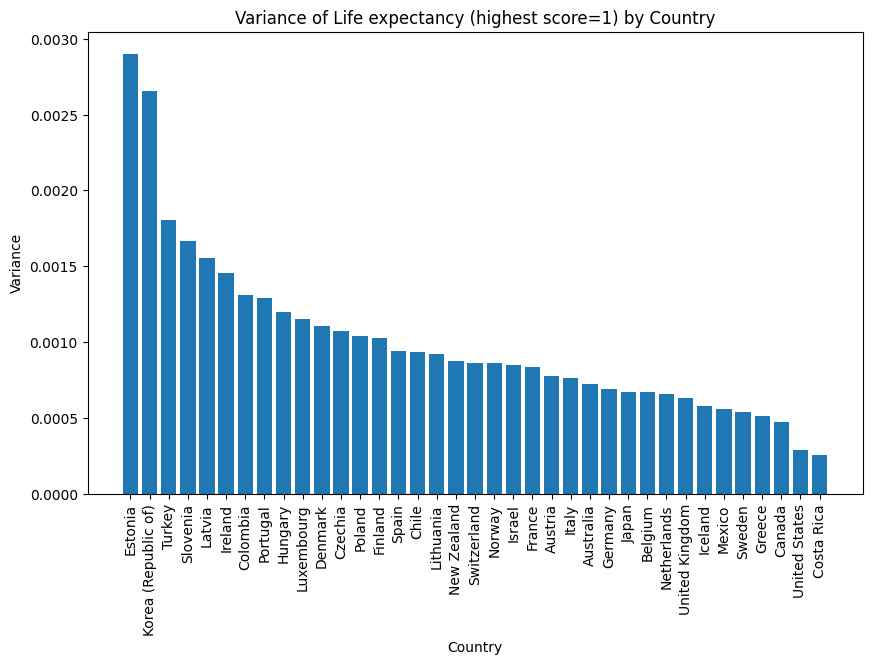

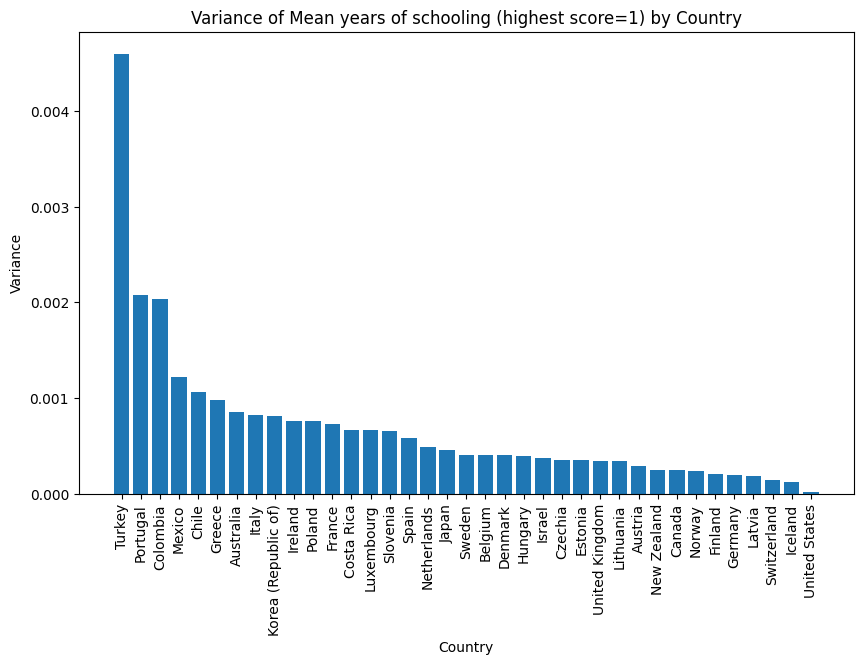

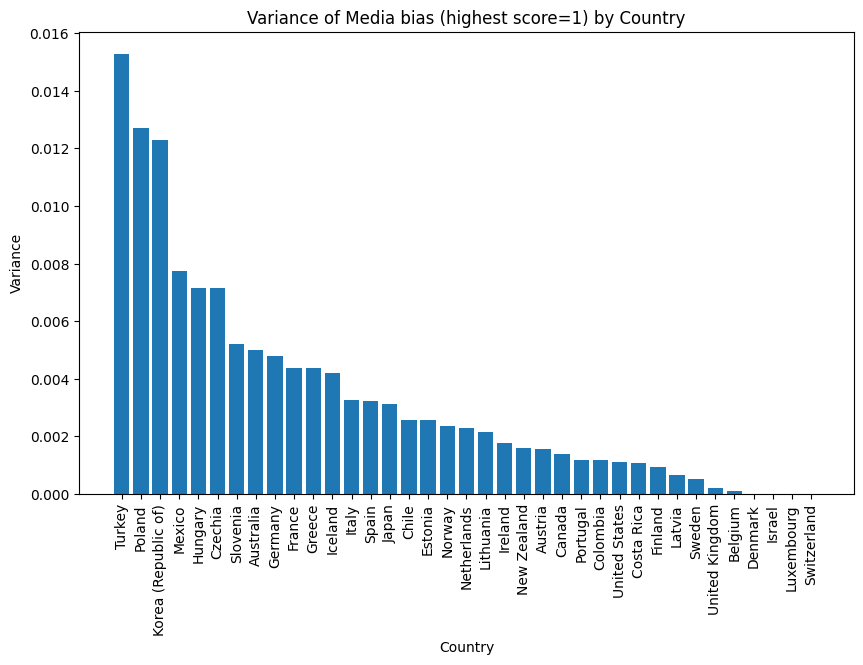

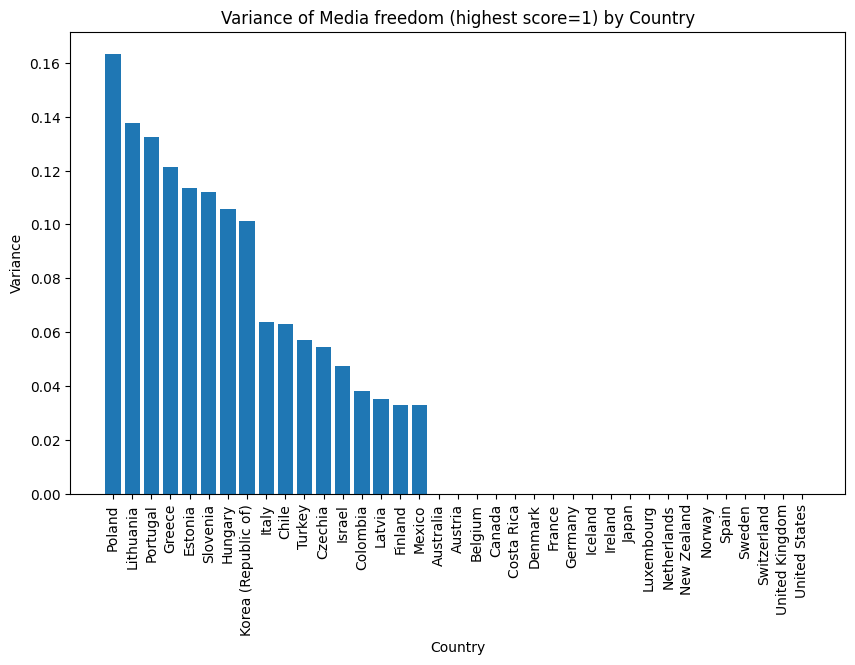

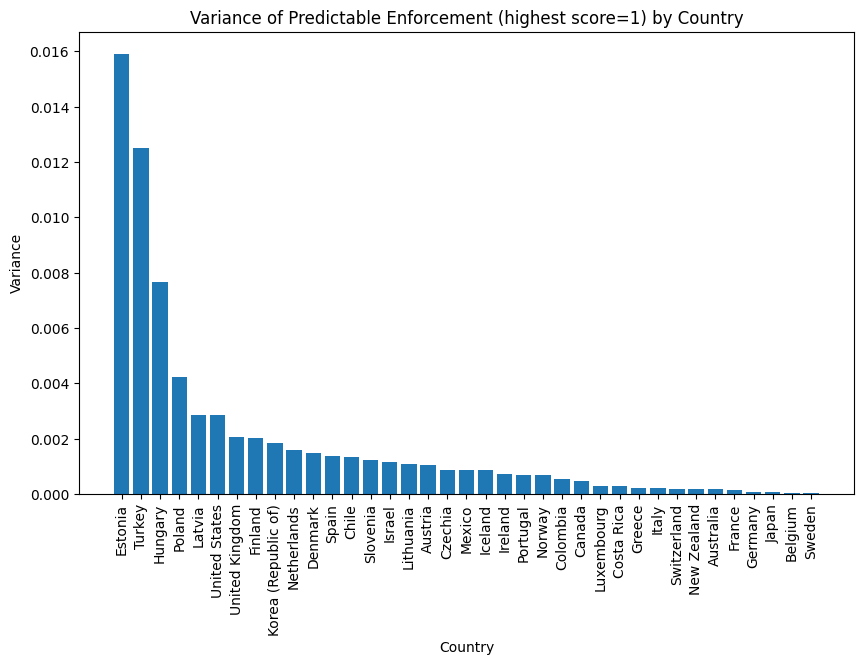

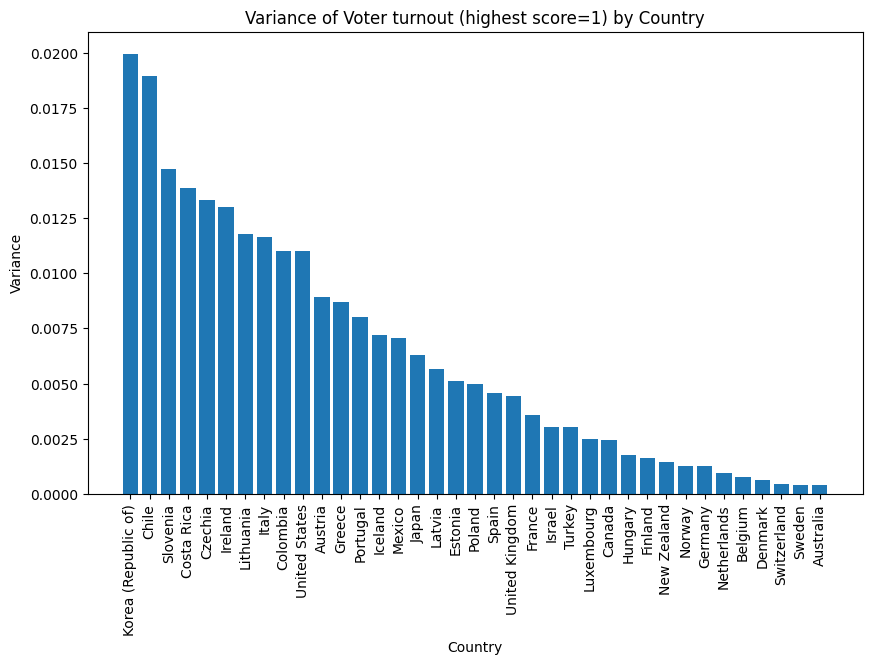

In [75]:
for i in df_combines.columns.difference(['country', 'year']):
    variance_analysis(df_combines, i)

In [95]:

def variance_analysis_all(df):
    """
    Calculates the variance of all features across all countries combined.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'country', 'year', and the feature columns.

    Returns:
    - Plots the variance of all features combined.
    """
    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')
    
    # Calculate variance for each feature
    feature_variances = numeric_df.var().drop(['year'], errors='ignore')  # Exclude 'year' if present

    # Plot variance for each feature
    plt.figure(figsize=(10, 6))
    plt.bar(feature_variances.index, feature_variances.values, color='blue')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.title('Variance of All Features (All Countries Combined)')
    plt.tight_layout()
    plt.show()


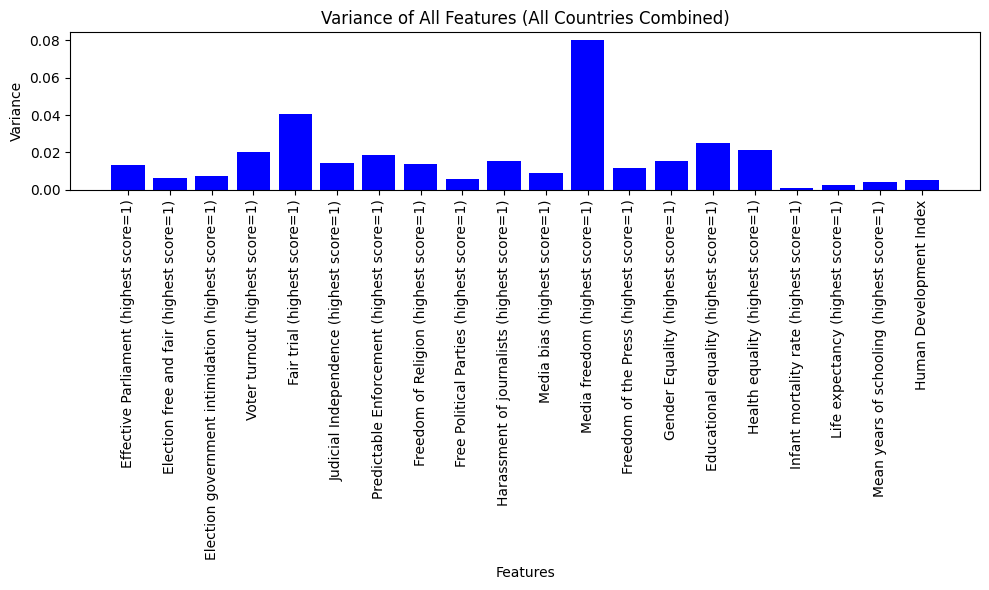

In [97]:
variance_analysis_all(df_combines)

In [ ]:
plot_feature_by_country(df_combines, 'Human Development Index')

In [57]:
df_combines.to_csv('/dataset/political_combined.csv')